# Logistic Regression for multi-class classification

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#### Load Iris dataset from Scikit Learn 

In [2]:
from sklearn import datasets
# load the iris datasets
dataset = datasets.load_iris()


#### Fit a logistic regression model to the data

In [3]:
model = LogisticRegression()
model.fit(dataset.data, dataset.target)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Accuracy

In [4]:
model.score(dataset.data, dataset.target)


0.95999999999999996

#### Make prediction

In [5]:
expected = dataset.target
predicted = model.predict(dataset.data)

#### summarize the fit of the model

In [6]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


## Regularization 

In [7]:
from sklearn import linear_model, datasets
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [12]:
def Regularization_Logistic(Regu,type):

    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:,:2]  # we only take the first two features.
    Y = iris.target

    h = .02  # step size in the mesh

    logreg = linear_model.LogisticRegression(C=Regu,penalty=type)

    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    expected = Y
    predicted = logreg.predict(X)
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))


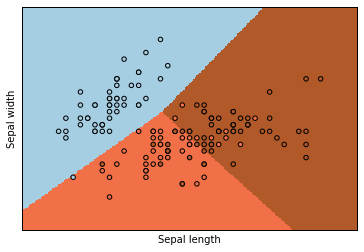

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.71      0.68      0.69        50
          2       0.70      0.74      0.72        50

avg / total       0.80      0.80      0.80       150

[[49  1  0]
 [ 0 34 16]
 [ 0 13 37]]


In [13]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
i = interact(Regularization_Logistic, Regu=(1,10000),type=('l1','l2'))